In [1]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [2]:
m = leafmap.Map(center=[-22.17615, -51.253043], zoom=18, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [3]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

In [4]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Image.tif [-51.2565, -22.1777, -51.2512, -22.175] 19
Downloaded image 01/45
Downloaded image 02/45
Downloaded image 03/45
Downloaded image 04/45
Downloaded image 05/45
Downloaded image 06/45
Downloaded image 07/45
Downloaded image 08/45
Downloaded image 09/45
Downloaded image 10/45
Downloaded image 11/45
Downloaded image 12/45
Downloaded image 13/45
Downloaded image 14/45
Downloaded image 15/45
Downloaded image 16/45
Downloaded image 17/45
Downloaded image 18/45
Downloaded image 19/45
Downloaded image 20/45
Downloaded image 21/45
Downloaded image 22/45
Downloaded image 23/45
Downloaded image 24/45
Downloaded image 25/45
Downloaded image 26/45
Downloaded image 27/45
Downloaded image 28/45
Downloaded image 29/45
Downloaded image 30/45
Downloaded image 31/45
Downloaded image 32/45
Downloaded image 33/45
Downloaded image 34/45
Downloaded image 35/45
Downloaded image 36/45
Downloaded image 37/45
Downloaded image 38/45
Downloaded image 39/45
Downloaded image 40/45
Downloaded image 41/45
Down

In [5]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(center=[-22.17635, -51.25385], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [6]:
sam = LangSAM()


final text_encoder_type: bert-base-uncased


In [7]:

text_prompt = "trees"

In [8]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

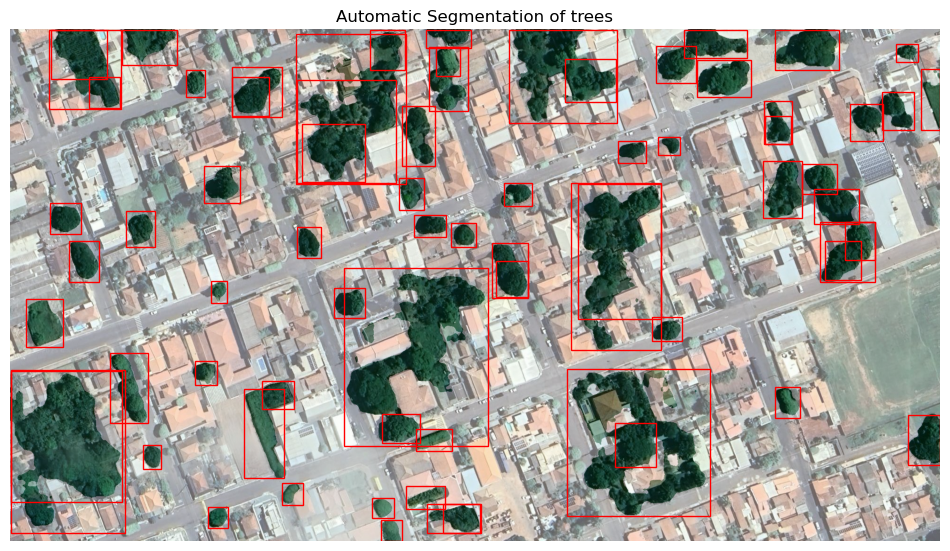

In [9]:
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title=f"Automatic Segmentation of {text_prompt}",
    blend=True,
)

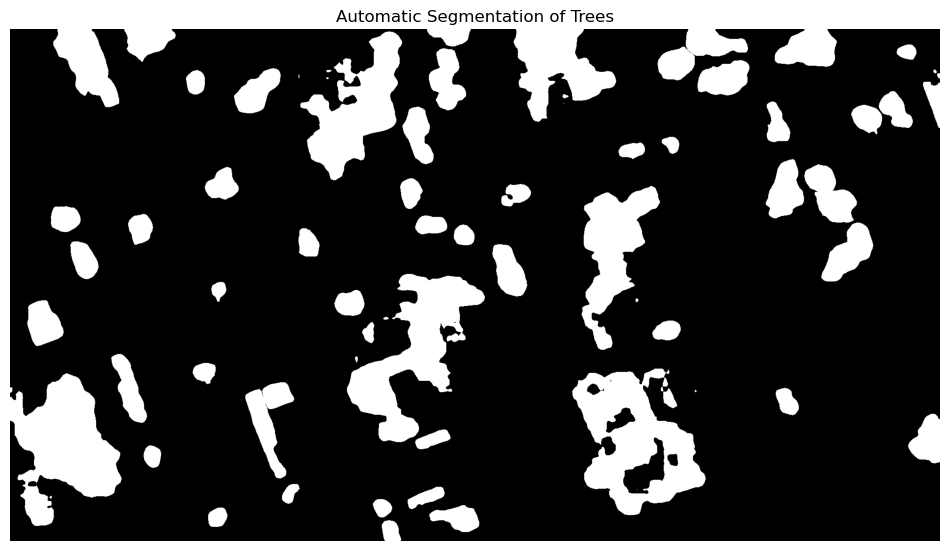

In [10]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Trees",
    blend=False,
    output=f"{text_prompt}.tif",
)

In [11]:
sam.raster_to_vector(f"{text_prompt}.tif", f"{text_prompt}.shp")


In [12]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(f"{text_prompt}.shp", layer_name="Vector", style=style)

In [13]:
sam.show_map()

Map(center=[-22.17635, -51.25385], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…